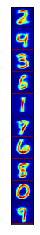

c:\users\nhay103\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nhay103\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nhay103\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\nhay103\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\

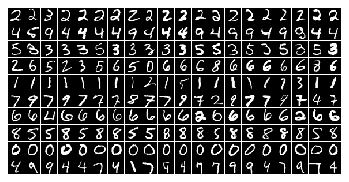

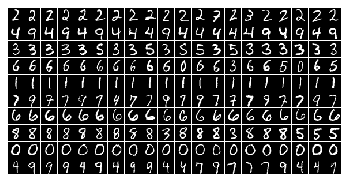

In [21]:
import numpy as np
from mnist.loader import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from display_network import *

mndata = MNIST('./MNIST/')
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0
X = X0

K = 10
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()

N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()


plt.axis('off')
A = display_network(X1.T, 10, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()

plt.show()

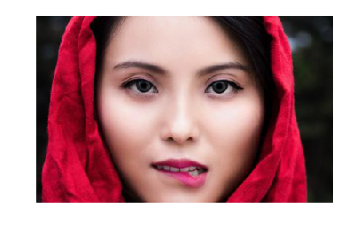

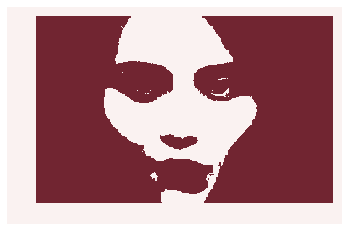

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


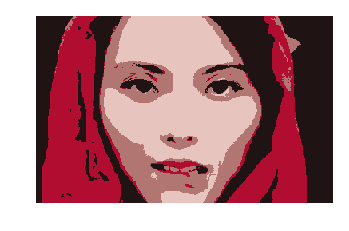

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


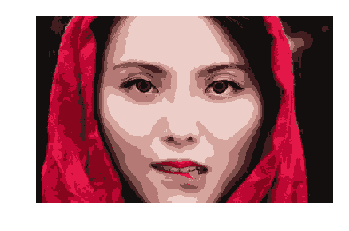

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


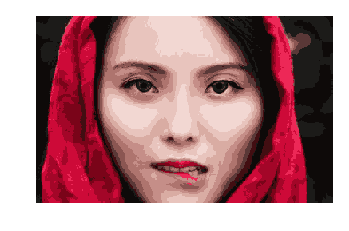

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


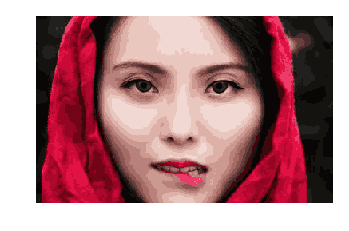

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


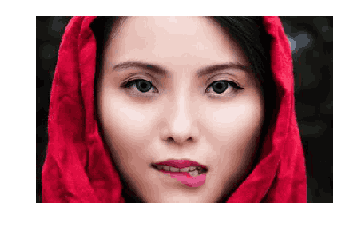

In [22]:
import matplotlib.image as mpimg

img = mpimg.imread('girl3.jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

for K in [2, 5, 10, 15, 20, 50]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()